# Comparing Silhouette, Davies-Bouldin, Calinski-Harabasz methods

### Method for plotting the results

In [1]:
from matplotlib import pyplot as plt

def plot_result(size_values, s_times, db_times, ch_times, addition):

    default_x_ticks = range(len(size_values))

    plt.title('Running times of the methods (' + addition + ')')

    plt.plot(s_times, label='Silhouette method')
    plt.plot(db_times, label='Davies-Bouldin method')
    plt.plot(ch_times, label='Calinski-Harabasz method')

    plt.xticks(default_x_ticks, size_values)

    plt.xlabel("Image size")
    plt.ylabel("Time (s)")

    plt.legend()
    plt.show()

## Calculating and plotting run times for different images and different image sizes k=2

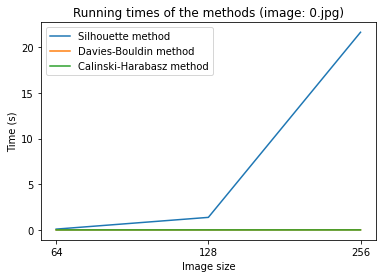

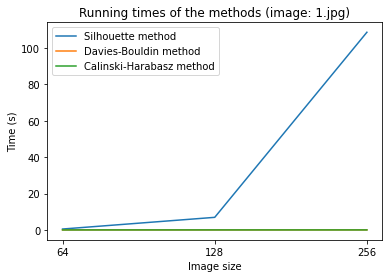

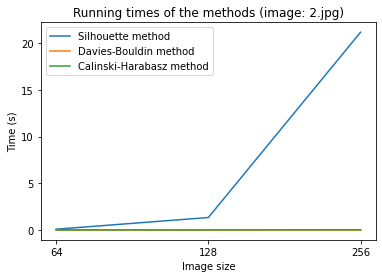

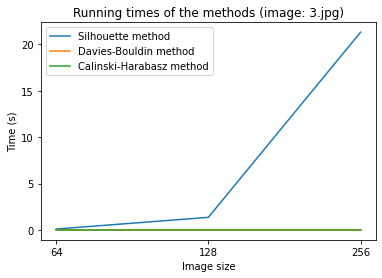

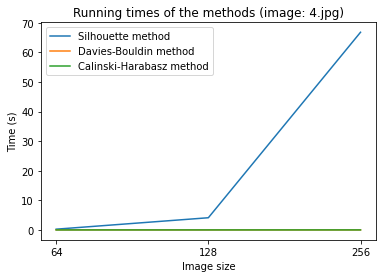

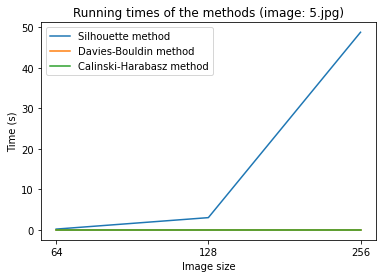

In [2]:
import commonmethods.image_modification as im
import commonmethods.optimal_cluster_number as ocn

size_values = [64, 128, 256]

for i in range(6):
    s_times = []
    db_times = []
    ch_times = []

    image = im.load_image_grayscale(format(i))

    for j in size_values:
        resized_image = im.resize_image(image, j)
        
        pixel_values = resized_image.reshape((-1, 1))

        _,labels,_ = im.kmeans_segmentation(pixel_values, 2)

        s_time, s_score = ocn.silhouette_method(pixel_values, labels)
        db_time, db_score = ocn.davies_bouldin_method(pixel_values, labels)
        ch_time, ch_score = ocn.calinski_harabasz_method(pixel_values, labels)
        
        s_times.append(s_time)
        db_times.append(db_time)
        ch_times.append(ch_time)

    addition = 'image: ' + format(i) + '.jpg'
    plot_result(size_values, s_times, db_times, ch_times, addition)

## Calculating and plotting run times for different cluster numbers and different image sizes

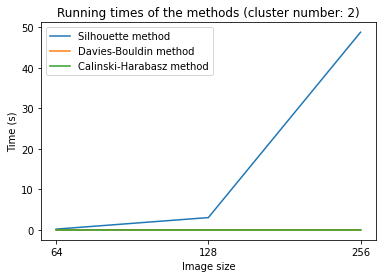

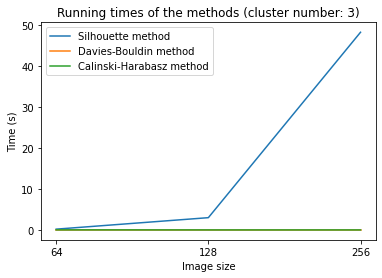

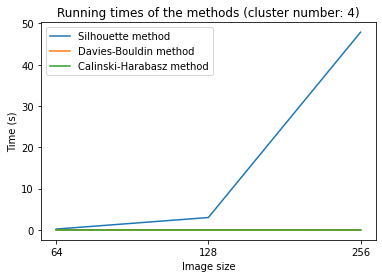

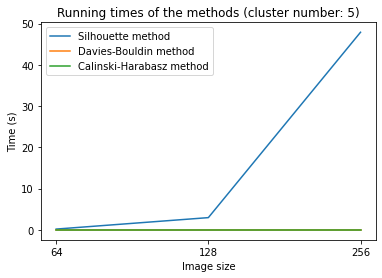

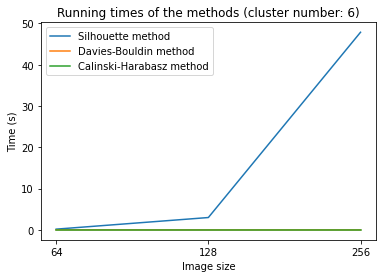

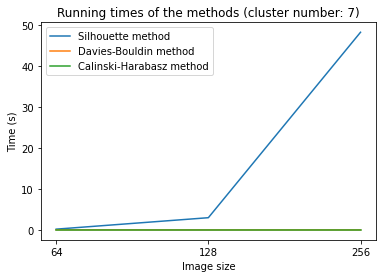

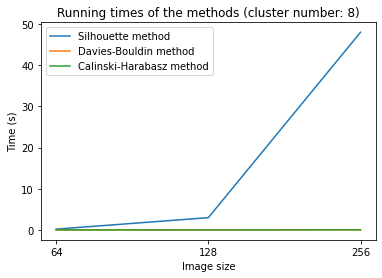

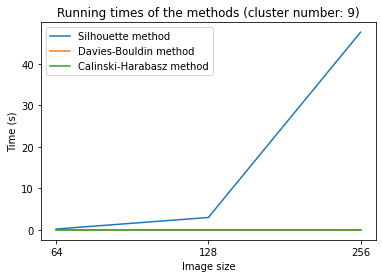

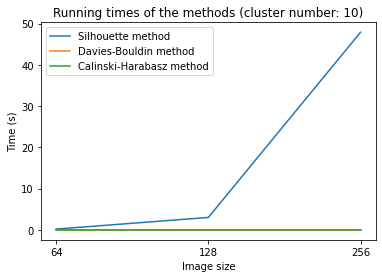

[[0.807986861942772, 2], [0.8142919371506836, 2], [0.8173462111946849, 2]]
[[0.2761858774539716, 2], [0.26840136397712555, 2], [0.26422422531080186, 2]]
[[160740.92961479313, 10], [599320.6896854851, 9], [2491654.831302712, 9]]


In [3]:
import commonmethods.image_modification as im
import commonmethods.optimal_cluster_number as ocn

size_values = [64, 128, 256]

#the best value and the cluster which resulted
s_closest = [[0, 2], [0, 2], [0, 2]]
db_min = [[1000000, 2], [1000000, 2], [1000000, 2]]
ch_max = [[0, 2], [0, 2], [0, 2]]

image = im.load_image_grayscale('5')

for i in range(2, 11):
    s_times = []
    db_times = []
    ch_times = []

    for j, val in enumerate(size_values):
        resized_image = im.resize_image(image, val)
        
        pixel_values = resized_image.reshape((-1, 1))

        _,labels,_ = im.kmeans_segmentation(pixel_values, i)
        
        s_time, s_score = ocn.silhouette_method(pixel_values, labels)
        db_time, db_score = ocn.davies_bouldin_method(pixel_values, labels)
        ch_time, ch_score = ocn.calinski_harabasz_method(pixel_values, labels)

        s_times.append(s_time)
        db_times.append(db_time)
        ch_times.append(ch_time)
        
        #print('s_score: ' + format(s_score) + ', db_score: ' + format(db_score) + ', ch_score: ' + format(ch_score))
        
        #get the best cluster number for each methods
        if((1-s_score) < (1-s_closest[j][0])):
            s_closest[j] = [s_score, i]
            
        if(db_score < db_min[j][0]):
            db_min[j] = [db_score, i]
            
        if(ch_score > ch_max[j][0]):
            ch_max[j] = [ch_score, i]
        

    addition = 'cluster number: ' + format(i)
    plot_result(size_values, s_times, db_times, ch_times, addition)

print(s_closest)
print(db_min)
print(ch_max)